In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

# Carregando a Base de Dados

https://www.kaggle.com/zalando-research/fashionmnist

In [2]:
dataset_train = pd.read_csv("fashion_mnist/train.csv")
dataset_test = pd.read_csv("fashion_mnist/test.csv")

dataset_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pré-processamento da base de dados

1. Separação dos dados em X (variáveis independentes) e y (variável dependente)
2. Normalização

In [3]:
X_train = dataset_train.iloc[:, 1:]
y_train = dataset_train.iloc[:, 0]
X_test = dataset_test.iloc[:, 1:]
y_test = dataset_test.iloc[:, 0]

X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

# Arquitetura de Rede Neural (MLP)

In [5]:
tf.__version__

'2.6.0'

In [6]:
gpus = tf.config.list_physical_devices('GPU')

gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# GridSearch na MLP

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [8]:
def create_model(optimizer='adam'):
    ann = Sequential()
    ann.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
    ann.add(Dense(units=10, activation='softmax'))
    ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return ann

In [9]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [10]:
# define the grid search parameters
optimizer = ['SGD', 'Adam']
batch_size = [16, 32]
epochs = [20, 30]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=5)
grid_result = grid.fit(X_train, y_train)

Epoch 1/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4999 - accuracy: 0.8243
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3721 - accuracy: 0.8667
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3350 - accuracy: 0.8799
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3096 - accuracy: 0.8879
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2895 - accuracy: 0.8951
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2737 - accuracy: 0.9016
Epoch 7/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2590 - accuracy: 0.9063
Epoch 8/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2457 - accuracy: 0.9107
Epoch 9/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2354 - accuracy: 0.9162
Epoch 10/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.224

3000/3000 [==============================] - 5s 2ms/step - loss: 0.1651 - accuracy: 0.9423
Epoch 18/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1588 - accuracy: 0.9448
Epoch 19/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1514 - accuracy: 0.9470
Epoch 20/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3505 - accuracy: 0.8890
Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5002 - accuracy: 0.8237
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3720 - accuracy: 0.8673
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3343 - accuracy: 0.8802
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3083 - accuracy: 0.8889
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2900 - accuracy: 0.8947
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2723 - accurac

3000/3000 [==============================] - 6s 2ms/step - loss: 0.1814 - accuracy: 0.9336
Epoch 13/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1690 - accuracy: 0.9391
Epoch 14/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1651 - accuracy: 0.9412
Epoch 15/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1578 - accuracy: 0.9435
Epoch 16/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1483 - accuracy: 0.9478
Epoch 17/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1439 - accuracy: 0.9478
Epoch 18/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1388 - accuracy: 0.9505
Epoch 19/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1391 - accuracy: 0.9532
Epoch 20/20
750/750 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.8773
Epoch 1/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4781 - ac

3000/3000 [==============================] - 5s 2ms/step - loss: 0.1126 - accuracy: 0.9626
Epoch 29/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1065 - accuracy: 0.9649
Epoch 30/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3818 - accuracy: 0.8863
Epoch 1/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5038 - accuracy: 0.8234
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3730 - accuracy: 0.8664
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3343 - accuracy: 0.8809
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3090 - accuracy: 0.8898
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2893 - accuracy: 0.8947
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2728 - accuracy: 0.9029
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2580 - accuracy

3000/3000 [==============================] - 5s 2ms/step - loss: 0.1859 - accuracy: 0.9346
Epoch 15/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1773 - accuracy: 0.9383: 0s - loss: 0.1773 - accuracy
Epoch 16/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1706 - accuracy: 0.9401
Epoch 17/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1635 - accuracy: 0.9429
Epoch 18/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1572 - accuracy: 0.9449
Epoch 19/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1509 - accuracy: 0.9478
Epoch 20/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1448 - accuracy: 0.9498
Epoch 21/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1396 - accuracy: 0.9518
Epoch 22/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1330 - accuracy: 0.9548
Epoch 23/30
3000/3000 [==============================] 

750/750 [==============================] - 1s 1ms/step - loss: 0.7654 - accuracy: 0.8837
Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4835 - accuracy: 0.8304
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3589 - accuracy: 0.8710
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3176 - accuracy: 0.8832: 0s - loss: 0.3173 - ac
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2884 - accuracy: 0.8933
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2681 - accuracy: 0.9014
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2516 - accuracy: 0.9073: 0s - loss: 0.2507 - accuracy: 0.
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2310 - accuracy: 0.9143
Epoch 8/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2205 - accuracy: 0.9196
Epoch 9/30
3000/3000 [===============

3000/3000 [==============================] - 6s 2ms/step - loss: 0.1406 - accuracy: 0.9494
Epoch 18/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1461 - accuracy: 0.9493
Epoch 19/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1293 - accuracy: 0.9553: 0s - loss: 0.1293 - accuracy: 0.95
Epoch 20/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1255 - accuracy: 0.9569
Epoch 21/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1286 - accuracy: 0.9573
Epoch 22/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1236 - accuracy: 0.9567
Epoch 23/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1151 - accuracy: 0.9594
Epoch 24/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1138 - accuracy: 0.9603
Epoch 25/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1127 - accuracy: 0.9620
Epoch 26/30
3000/3000 [==========================

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2405 - accuracy: 0.9131
Epoch 14/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2335 - accuracy: 0.9169
Epoch 15/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2267 - accuracy: 0.9193
Epoch 16/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2202 - accuracy: 0.9217
Epoch 17/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2147 - accuracy: 0.9241
Epoch 18/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2074 - accuracy: 0.9275
Epoch 19/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2020 - accuracy: 0.9296
Epoch 20/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3325 - accuracy: 0.8838
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5633 - accuracy: 0.8041
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4071 - acc

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2226 - accuracy: 0.9174: 0s - loss:
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2058 - accuracy: 0.9236
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1967 - accuracy: 0.9269
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1838 - accuracy: 0.9332
Epoch 11/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1716 - accuracy: 0.9376
Epoch 12/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1638 - accuracy: 0.9390
Epoch 13/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1562 - accuracy: 0.9427
Epoch 14/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1436 - accuracy: 0.9473
Epoch 15/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9494
Epoch 16/20
1500/1500 [==============================] - 3s 2ms/step - loss

Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8751
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.8887: 0s - loss: 0.305
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8984
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9065
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2364 - accuracy: 0.9118
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2182 - accuracy: 0.9193
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2091 - accuracy: 0.9223
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1953 - accuracy: 0.9279: 0s - loss: 0.1953 - 
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1843 - accuracy: 0.9317
Epoch 11/20
1500/1500 [==================

1500/1500 [==============================] - 3s 2ms/step - loss: 0.1561 - accuracy: 0.9474
Epoch 30/30
375/375 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8876
Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5608 - accuracy: 0.8039
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4081 - accuracy: 0.8524
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3696 - accuracy: 0.8672
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3444 - accuracy: 0.8765
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3263 - accuracy: 0.8822
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8884
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2977 - accuracy: 0.8928
Epoch 8/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2870 - accuracy:

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2219 - accuracy: 0.9214
Epoch 16/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2157 - accuracy: 0.9247
Epoch 17/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2096 - accuracy: 0.9252
Epoch 18/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2038 - accuracy: 0.9273
Epoch 19/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1980 - accuracy: 0.9299
Epoch 20/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1926 - accuracy: 0.9327
Epoch 21/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1873 - accuracy: 0.9352
Epoch 22/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1827 - accuracy: 0.9360
Epoch 23/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1779 - accuracy: 0.9384
Epoch 24/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1728 -

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.8326
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8749
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.8878
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2789 - accuracy: 0.8969
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9054
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2380 - accuracy: 0.9102
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2224 - accuracy: 0.9174
Epoch 8/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2029 - accuracy: 0.9253
Epoch 9/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1939 - accuracy: 0.9284
Epoch 10/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1823 - accurac

1500/1500 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9567: 0s - loss: 0.1
Epoch 19/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1105 - accuracy: 0.9603
Epoch 20/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1126 - accuracy: 0.9590
Epoch 21/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1137 - accuracy: 0.9614
Epoch 22/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0996 - accuracy: 0.9645
Epoch 23/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9663
Epoch 24/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0933 - accuracy: 0.9654
Epoch 25/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9688
Epoch 26/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0920 - accuracy: 0.9687
Epoch 27/30
1500/1500 [==============================] - 3s 2ms/step 

# Resultados

In [11]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887217 using {'batch_size': 32, 'epochs': 30, 'optimizer': 'SGD'}
0.886883 (0.002344) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'SGD'}
0.882150 (0.002851) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'Adam'}
0.886267 (0.001002) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'SGD'}
0.878483 (0.005249) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adam'}
0.886517 (0.003140) with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'SGD'}
0.884233 (0.003426) with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'Adam'}
0.887217 (0.002606) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'SGD'}
0.882383 (0.001051) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'Adam'}


# Otimizando SGD

In [8]:
def create_model_SGD(neurons=128, learn_rate=0.01, momentum=0):
    ann = Sequential()
    ann.add(Dense(units=neurons, activation='relu', kernel_initializer='he_normal'))
    ann.add(Dense(units=10, activation='softmax'))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learn_rate, momentum=momentum)
    ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return ann

# create model
model = KerasClassifier(build_fn=create_model_SGD, epochs=30, batch_size=32, verbose=2)

In [9]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4]
neurons = [64, 128]
param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=5)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
1500/1500 - 2s - loss: 1.0301 - accuracy: 0.6570
Epoch 2/30
1500/1500 - 2s - loss: 0.6599 - accuracy: 0.7726
Epoch 3/30
1500/1500 - 2s - loss: 0.5780 - accuracy: 0.7985
Epoch 4/30
1500/1500 - 2s - loss: 0.5346 - accuracy: 0.8136
Epoch 5/30
1500/1500 - 2s - loss: 0.5065 - accuracy: 0.8221
Epoch 6/30
1500/1500 - 2s - loss: 0.4860 - accuracy: 0.8286
Epoch 7/30
1500/1500 - 2s - loss: 0.4702 - accuracy: 0.8342
Epoch 8/30
1500/1500 - 2s - loss: 0.4572 - accuracy: 0.8385
Epoch 9/30
1500/1500 - 2s - loss: 0.4462 - accuracy: 0.8416
Epoch 10/30
1500/1500 - 2s - loss: 0.4368 - accuracy: 0.8451
Epoch 11/30
1500/1500 - 2s - loss: 0.4287 - accuracy: 0.8475
Epoch 12/30
1500/1500 - 2s - loss: 0.4215 - accuracy: 0.8501
Epoch 13/30
1500/1500 - 2s - loss: 0.4150 - accuracy: 0.8525
Epoch 14/30
1500/1500 - 2s - loss: 0.4090 - accuracy: 0.8549
Epoch 15/30
1500/1500 - 2s - loss: 0.4037 - accuracy: 0.8567
Epoch 16/30
1500/1500 - 2s - loss: 0.3986 - accuracy: 0.8585
Epoch 17/30
1500/1500 - 2s - loss

Epoch 13/30
1500/1500 - 2s - loss: 0.4086 - accuracy: 0.8543
Epoch 14/30
1500/1500 - 2s - loss: 0.4027 - accuracy: 0.8564
Epoch 15/30
1500/1500 - 2s - loss: 0.3973 - accuracy: 0.8587
Epoch 16/30
1500/1500 - 2s - loss: 0.3924 - accuracy: 0.8605
Epoch 17/30
1500/1500 - 2s - loss: 0.3878 - accuracy: 0.8617
Epoch 18/30
1500/1500 - 2s - loss: 0.3833 - accuracy: 0.8637
Epoch 19/30
1500/1500 - 2s - loss: 0.3796 - accuracy: 0.8649
Epoch 20/30
1500/1500 - 2s - loss: 0.3758 - accuracy: 0.8664
Epoch 21/30
1500/1500 - 2s - loss: 0.3722 - accuracy: 0.8676
Epoch 22/30
1500/1500 - 2s - loss: 0.3691 - accuracy: 0.8695
Epoch 23/30
1500/1500 - 2s - loss: 0.3659 - accuracy: 0.8700
Epoch 24/30
1500/1500 - 2s - loss: 0.3629 - accuracy: 0.8708
Epoch 25/30
1500/1500 - 2s - loss: 0.3599 - accuracy: 0.8719
Epoch 26/30
1500/1500 - 2s - loss: 0.3572 - accuracy: 0.8730
Epoch 27/30
1500/1500 - 2s - loss: 0.3545 - accuracy: 0.8737
Epoch 28/30
1500/1500 - 2s - loss: 0.3519 - accuracy: 0.8746
Epoch 29/30
1500/1500 - 

Epoch 25/30
1500/1500 - 2s - loss: 0.3499 - accuracy: 0.8756
Epoch 26/30
1500/1500 - 2s - loss: 0.3470 - accuracy: 0.8770
Epoch 27/30
1500/1500 - 2s - loss: 0.3441 - accuracy: 0.8779
Epoch 28/30
1500/1500 - 2s - loss: 0.3415 - accuracy: 0.8783
Epoch 29/30
1500/1500 - 2s - loss: 0.3389 - accuracy: 0.8803
Epoch 30/30
1500/1500 - 2s - loss: 0.3364 - accuracy: 0.8813
375/375 - 0s - loss: 0.3784 - accuracy: 0.8639
Epoch 1/30
1500/1500 - 2s - loss: 0.9595 - accuracy: 0.6860
Epoch 2/30
1500/1500 - 2s - loss: 0.6269 - accuracy: 0.7843
Epoch 3/30
1500/1500 - 2s - loss: 0.5549 - accuracy: 0.8068
Epoch 4/30
1500/1500 - 2s - loss: 0.5149 - accuracy: 0.8200
Epoch 5/30
1500/1500 - 2s - loss: 0.4884 - accuracy: 0.8285
Epoch 6/30
1500/1500 - 2s - loss: 0.4688 - accuracy: 0.8351
Epoch 7/30
1500/1500 - 2s - loss: 0.4536 - accuracy: 0.8399
Epoch 8/30
1500/1500 - 2s - loss: 0.4411 - accuracy: 0.8449
Epoch 9/30
1500/1500 - 2s - loss: 0.4305 - accuracy: 0.8492
Epoch 10/30
1500/1500 - 2s - loss: 0.4215 - acc

1500/1500 - 2s - loss: 0.4657 - accuracy: 0.8363
Epoch 7/30
1500/1500 - 2s - loss: 0.4511 - accuracy: 0.8412
Epoch 8/30
1500/1500 - 2s - loss: 0.4392 - accuracy: 0.8449
Epoch 9/30
1500/1500 - 2s - loss: 0.4293 - accuracy: 0.8479
Epoch 10/30
1500/1500 - 2s - loss: 0.4209 - accuracy: 0.8512
Epoch 11/30
1500/1500 - 2s - loss: 0.4134 - accuracy: 0.8542
Epoch 12/30
1500/1500 - 2s - loss: 0.4068 - accuracy: 0.8565
Epoch 13/30
1500/1500 - 2s - loss: 0.4007 - accuracy: 0.8584
Epoch 14/30
1500/1500 - 2s - loss: 0.3953 - accuracy: 0.8609
Epoch 15/30
1500/1500 - 2s - loss: 0.3900 - accuracy: 0.8624
Epoch 16/30
1500/1500 - 2s - loss: 0.3853 - accuracy: 0.8642
Epoch 17/30
1500/1500 - 2s - loss: 0.3809 - accuracy: 0.8656
Epoch 18/30
1500/1500 - 2s - loss: 0.3768 - accuracy: 0.8669
Epoch 19/30
1500/1500 - 2s - loss: 0.3731 - accuracy: 0.8692
Epoch 20/30
1500/1500 - 2s - loss: 0.3695 - accuracy: 0.8700
Epoch 21/30
1500/1500 - 2s - loss: 0.3658 - accuracy: 0.8718
Epoch 22/30
1500/1500 - 2s - loss: 0.36

1500/1500 - 2s - loss: 0.3606 - accuracy: 0.8727
Epoch 19/30
1500/1500 - 2s - loss: 0.3563 - accuracy: 0.8739
Epoch 20/30
1500/1500 - 2s - loss: 0.3526 - accuracy: 0.8752
Epoch 21/30
1500/1500 - 2s - loss: 0.3489 - accuracy: 0.8771
Epoch 22/30
1500/1500 - 2s - loss: 0.3456 - accuracy: 0.8779
Epoch 23/30
1500/1500 - 2s - loss: 0.3420 - accuracy: 0.8792
Epoch 24/30
1500/1500 - 2s - loss: 0.3390 - accuracy: 0.8805
Epoch 25/30
1500/1500 - 2s - loss: 0.3360 - accuracy: 0.8810
Epoch 26/30
1500/1500 - 2s - loss: 0.3331 - accuracy: 0.8819
Epoch 27/30
1500/1500 - 2s - loss: 0.3302 - accuracy: 0.8830
Epoch 28/30
1500/1500 - 2s - loss: 0.3274 - accuracy: 0.8843
Epoch 29/30
1500/1500 - 2s - loss: 0.3249 - accuracy: 0.8848
Epoch 30/30
1500/1500 - 2s - loss: 0.3222 - accuracy: 0.8862
375/375 - 0s - loss: 0.3589 - accuracy: 0.8747
Epoch 1/30
1500/1500 - 2s - loss: 0.8932 - accuracy: 0.6962
Epoch 2/30
1500/1500 - 2s - loss: 0.5948 - accuracy: 0.7920
Epoch 3/30
1500/1500 - 2s - loss: 0.5296 - accuracy:

1500/1500 - 2s - loss: 0.3159 - accuracy: 0.8882
375/375 - 0s - loss: 0.3610 - accuracy: 0.8702
Epoch 1/30
1500/1500 - 2s - loss: 0.8816 - accuracy: 0.6987
Epoch 2/30
1500/1500 - 2s - loss: 0.5817 - accuracy: 0.7935
Epoch 3/30
1500/1500 - 2s - loss: 0.5174 - accuracy: 0.8163
Epoch 4/30
1500/1500 - 2s - loss: 0.4812 - accuracy: 0.8299
Epoch 5/30
1500/1500 - 2s - loss: 0.4573 - accuracy: 0.8379
Epoch 6/30
1500/1500 - 2s - loss: 0.4395 - accuracy: 0.8439
Epoch 7/30
1500/1500 - 2s - loss: 0.4251 - accuracy: 0.8496
Epoch 8/30
1500/1500 - 2s - loss: 0.4136 - accuracy: 0.8532
Epoch 9/30
1500/1500 - 2s - loss: 0.4040 - accuracy: 0.8569
Epoch 10/30
1500/1500 - 2s - loss: 0.3958 - accuracy: 0.8596
Epoch 11/30
1500/1500 - 2s - loss: 0.3882 - accuracy: 0.8621
Epoch 12/30
1500/1500 - 2s - loss: 0.3818 - accuracy: 0.8653
Epoch 13/30
1500/1500 - 2s - loss: 0.3758 - accuracy: 0.8675
Epoch 14/30
1500/1500 - 2s - loss: 0.3703 - accuracy: 0.8689
Epoch 15/30
1500/1500 - 2s - loss: 0.3655 - accuracy: 0.870

Epoch 12/30
1500/1500 - 2s - loss: 0.3702 - accuracy: 0.8693
Epoch 13/30
1500/1500 - 2s - loss: 0.3642 - accuracy: 0.8710
Epoch 14/30
1500/1500 - 2s - loss: 0.3586 - accuracy: 0.8735
Epoch 15/30
1500/1500 - 2s - loss: 0.3534 - accuracy: 0.8760
Epoch 16/30
1500/1500 - 2s - loss: 0.3488 - accuracy: 0.8765
Epoch 17/30
1500/1500 - 2s - loss: 0.3442 - accuracy: 0.8779
Epoch 18/30
1500/1500 - 2s - loss: 0.3400 - accuracy: 0.8796
Epoch 19/30
1500/1500 - 2s - loss: 0.3359 - accuracy: 0.8815
Epoch 20/30
1500/1500 - 2s - loss: 0.3321 - accuracy: 0.8828
Epoch 21/30
1500/1500 - 2s - loss: 0.3282 - accuracy: 0.8839
Epoch 22/30
1500/1500 - 2s - loss: 0.3249 - accuracy: 0.8857
Epoch 23/30
1500/1500 - 2s - loss: 0.3214 - accuracy: 0.8866
Epoch 24/30
1500/1500 - 2s - loss: 0.3183 - accuracy: 0.8880
Epoch 25/30
1500/1500 - 2s - loss: 0.3153 - accuracy: 0.8885
Epoch 26/30
1500/1500 - 2s - loss: 0.3121 - accuracy: 0.8897
Epoch 27/30
1500/1500 - 2s - loss: 0.3095 - accuracy: 0.8915
Epoch 28/30
1500/1500 - 

Epoch 24/30
1500/1500 - 2s - loss: 0.2075 - accuracy: 0.9274
Epoch 25/30
1500/1500 - 2s - loss: 0.2040 - accuracy: 0.9277
Epoch 26/30
1500/1500 - 2s - loss: 0.2001 - accuracy: 0.9297
Epoch 27/30
1500/1500 - 2s - loss: 0.1968 - accuracy: 0.9313
Epoch 28/30
1500/1500 - 2s - loss: 0.1924 - accuracy: 0.9320
Epoch 29/30
1500/1500 - 2s - loss: 0.1889 - accuracy: 0.9337
Epoch 30/30
1500/1500 - 2s - loss: 0.1854 - accuracy: 0.9356
375/375 - 0s - loss: 0.3395 - accuracy: 0.8829
Epoch 1/30
1500/1500 - 2s - loss: 0.5851 - accuracy: 0.7969
Epoch 2/30
1500/1500 - 2s - loss: 0.4145 - accuracy: 0.8530
Epoch 3/30
1500/1500 - 2s - loss: 0.3769 - accuracy: 0.8662
Epoch 4/30
1500/1500 - 2s - loss: 0.3539 - accuracy: 0.8738
Epoch 5/30
1500/1500 - 2s - loss: 0.3370 - accuracy: 0.8806
Epoch 6/30
1500/1500 - 2s - loss: 0.3235 - accuracy: 0.8856
Epoch 7/30
1500/1500 - 2s - loss: 0.3117 - accuracy: 0.8884
Epoch 8/30
1500/1500 - 2s - loss: 0.3016 - accuracy: 0.8930
Epoch 9/30
1500/1500 - 2s - loss: 0.2926 - acc

1500/1500 - 2s - loss: 0.3285 - accuracy: 0.8823
Epoch 6/30
1500/1500 - 2s - loss: 0.3133 - accuracy: 0.8886
Epoch 7/30
1500/1500 - 2s - loss: 0.3007 - accuracy: 0.8914
Epoch 8/30
1500/1500 - 2s - loss: 0.2886 - accuracy: 0.8975
Epoch 9/30
1500/1500 - 2s - loss: 0.2787 - accuracy: 0.8997
Epoch 10/30
1500/1500 - 2s - loss: 0.2689 - accuracy: 0.9039
Epoch 11/30
1500/1500 - 2s - loss: 0.2604 - accuracy: 0.9078
Epoch 12/30
1500/1500 - 2s - loss: 0.2522 - accuracy: 0.9101
Epoch 13/30
1500/1500 - 2s - loss: 0.2445 - accuracy: 0.9129
Epoch 14/30
1500/1500 - 2s - loss: 0.2375 - accuracy: 0.9163
Epoch 15/30
1500/1500 - 2s - loss: 0.2302 - accuracy: 0.9182
Epoch 16/30
1500/1500 - 2s - loss: 0.2244 - accuracy: 0.9208
Epoch 17/30
1500/1500 - 2s - loss: 0.2180 - accuracy: 0.9230
Epoch 18/30
1500/1500 - 2s - loss: 0.2123 - accuracy: 0.9253
Epoch 19/30
1500/1500 - 2s - loss: 0.2062 - accuracy: 0.9272
Epoch 20/30
1500/1500 - 2s - loss: 0.2010 - accuracy: 0.9296
Epoch 21/30
1500/1500 - 2s - loss: 0.195

1500/1500 - 2s - loss: 0.2144 - accuracy: 0.9243
Epoch 18/30
1500/1500 - 2s - loss: 0.2082 - accuracy: 0.9275
Epoch 19/30
1500/1500 - 2s - loss: 0.2028 - accuracy: 0.9286
Epoch 20/30
1500/1500 - 2s - loss: 0.1974 - accuracy: 0.9302
Epoch 21/30
1500/1500 - 2s - loss: 0.1920 - accuracy: 0.9331
Epoch 22/30
1500/1500 - 2s - loss: 0.1876 - accuracy: 0.9344
Epoch 23/30
1500/1500 - 2s - loss: 0.1823 - accuracy: 0.9361
Epoch 24/30
1500/1500 - 2s - loss: 0.1780 - accuracy: 0.9385
Epoch 25/30
1500/1500 - 2s - loss: 0.1740 - accuracy: 0.9392
Epoch 26/30
1500/1500 - 2s - loss: 0.1691 - accuracy: 0.9419
Epoch 27/30
1500/1500 - 2s - loss: 0.1655 - accuracy: 0.9440
Epoch 28/30
1500/1500 - 2s - loss: 0.1607 - accuracy: 0.9456
Epoch 29/30
1500/1500 - 2s - loss: 0.1565 - accuracy: 0.9478
Epoch 30/30
1500/1500 - 2s - loss: 0.1531 - accuracy: 0.9488
375/375 - 0s - loss: 0.3493 - accuracy: 0.8865
Epoch 1/30
1500/1500 - 2s - loss: 0.5504 - accuracy: 0.8099
Epoch 2/30
1500/1500 - 2s - loss: 0.4025 - accuracy

1500/1500 - 2s - loss: 0.1716 - accuracy: 0.9408
Epoch 30/30
1500/1500 - 2s - loss: 0.1685 - accuracy: 0.9422
375/375 - 0s - loss: 0.3568 - accuracy: 0.8834
Epoch 1/30
1500/1500 - 2s - loss: 0.5609 - accuracy: 0.8057
Epoch 2/30
1500/1500 - 2s - loss: 0.4046 - accuracy: 0.8560
Epoch 3/30
1500/1500 - 2s - loss: 0.3681 - accuracy: 0.8690
Epoch 4/30
1500/1500 - 2s - loss: 0.3451 - accuracy: 0.8776
Epoch 5/30
1500/1500 - 2s - loss: 0.3274 - accuracy: 0.8842
Epoch 6/30
1500/1500 - 2s - loss: 0.3127 - accuracy: 0.8884
Epoch 7/30
1500/1500 - 2s - loss: 0.3007 - accuracy: 0.8933
Epoch 8/30
1500/1500 - 2s - loss: 0.2905 - accuracy: 0.8969
Epoch 9/30
1500/1500 - 2s - loss: 0.2804 - accuracy: 0.9005
Epoch 10/30
1500/1500 - 2s - loss: 0.2716 - accuracy: 0.9024
Epoch 11/30
1500/1500 - 2s - loss: 0.2633 - accuracy: 0.9058
Epoch 12/30
1500/1500 - 2s - loss: 0.2562 - accuracy: 0.9083
Epoch 13/30
1500/1500 - 2s - loss: 0.2491 - accuracy: 0.9115
Epoch 14/30
1500/1500 - 2s - loss: 0.2427 - accuracy: 0.912

Epoch 11/30
1500/1500 - 2s - loss: 0.2418 - accuracy: 0.9131
Epoch 12/30
1500/1500 - 2s - loss: 0.2331 - accuracy: 0.9176
Epoch 13/30
1500/1500 - 2s - loss: 0.2260 - accuracy: 0.9197
Epoch 14/30
1500/1500 - 2s - loss: 0.2177 - accuracy: 0.9233
Epoch 15/30
1500/1500 - 2s - loss: 0.2106 - accuracy: 0.9259
Epoch 16/30
1500/1500 - 2s - loss: 0.2039 - accuracy: 0.9282
Epoch 17/30
1500/1500 - 2s - loss: 0.1977 - accuracy: 0.9307
Epoch 18/30
1500/1500 - 2s - loss: 0.1909 - accuracy: 0.9336
Epoch 19/30
1500/1500 - 2s - loss: 0.1848 - accuracy: 0.9346
Epoch 20/30
1500/1500 - 2s - loss: 0.1797 - accuracy: 0.9376
Epoch 21/30
1500/1500 - 2s - loss: 0.1739 - accuracy: 0.9395
Epoch 22/30
1500/1500 - 2s - loss: 0.1693 - accuracy: 0.9411
Epoch 23/30
1500/1500 - 2s - loss: 0.1634 - accuracy: 0.9443
Epoch 24/30
1500/1500 - 2s - loss: 0.1593 - accuracy: 0.9455
Epoch 25/30
1500/1500 - 2s - loss: 0.1537 - accuracy: 0.9478
Epoch 26/30
1500/1500 - 2s - loss: 0.1498 - accuracy: 0.9495
Epoch 27/30
1500/1500 - 

Epoch 23/30
1500/1500 - 2s - loss: 0.1737 - accuracy: 0.9384
Epoch 24/30
1500/1500 - 2s - loss: 0.1716 - accuracy: 0.9391
Epoch 25/30
1500/1500 - 2s - loss: 0.1654 - accuracy: 0.9422
Epoch 26/30
1500/1500 - 2s - loss: 0.1613 - accuracy: 0.9433
Epoch 27/30
1500/1500 - 2s - loss: 0.1578 - accuracy: 0.9449
Epoch 28/30
1500/1500 - 2s - loss: 0.1536 - accuracy: 0.9471
Epoch 29/30
1500/1500 - 2s - loss: 0.1507 - accuracy: 0.9485
Epoch 30/30
1500/1500 - 2s - loss: 0.1462 - accuracy: 0.9488
375/375 - 0s - loss: 0.3759 - accuracy: 0.8828
Epoch 1/30
1500/1500 - 2s - loss: 0.5384 - accuracy: 0.8115
Epoch 2/30
1500/1500 - 2s - loss: 0.3953 - accuracy: 0.8606
Epoch 3/30
1500/1500 - 2s - loss: 0.3583 - accuracy: 0.8715
Epoch 4/30
1500/1500 - 2s - loss: 0.3355 - accuracy: 0.8800
Epoch 5/30
1500/1500 - 2s - loss: 0.3172 - accuracy: 0.8859
Epoch 6/30
1500/1500 - 2s - loss: 0.3020 - accuracy: 0.8914
Epoch 7/30
1500/1500 - 2s - loss: 0.2902 - accuracy: 0.8949
Epoch 8/30
1500/1500 - 2s - loss: 0.2777 - ac

1500/1500 - 2s - loss: 0.3170 - accuracy: 0.8854
Epoch 5/30
1500/1500 - 2s - loss: 0.2975 - accuracy: 0.8928
Epoch 6/30
1500/1500 - 2s - loss: 0.2813 - accuracy: 0.8982
Epoch 7/30
1500/1500 - 2s - loss: 0.2680 - accuracy: 0.9032
Epoch 8/30
1500/1500 - 2s - loss: 0.2545 - accuracy: 0.9076
Epoch 9/30
1500/1500 - 2s - loss: 0.2437 - accuracy: 0.9116
Epoch 10/30
1500/1500 - 2s - loss: 0.2329 - accuracy: 0.9183
Epoch 11/30
1500/1500 - 2s - loss: 0.2235 - accuracy: 0.9199
Epoch 12/30
1500/1500 - 2s - loss: 0.2147 - accuracy: 0.9232
Epoch 13/30
1500/1500 - 2s - loss: 0.2058 - accuracy: 0.9260
Epoch 14/30
1500/1500 - 2s - loss: 0.1981 - accuracy: 0.9307
Epoch 15/30
1500/1500 - 2s - loss: 0.1905 - accuracy: 0.9324
Epoch 16/30
1500/1500 - 2s - loss: 0.1832 - accuracy: 0.9360
Epoch 17/30
1500/1500 - 2s - loss: 0.1770 - accuracy: 0.9384
Epoch 18/30
1500/1500 - 2s - loss: 0.1709 - accuracy: 0.9409
Epoch 19/30
1500/1500 - 2s - loss: 0.1640 - accuracy: 0.9420
Epoch 20/30
1500/1500 - 2s - loss: 0.1581

1500/1500 - 2s - loss: 0.1806 - accuracy: 0.9338
Epoch 17/30
1500/1500 - 2s - loss: 0.1676 - accuracy: 0.9377
Epoch 18/30
1500/1500 - 2s - loss: 0.1633 - accuracy: 0.9392
Epoch 19/30
1500/1500 - 2s - loss: 0.1607 - accuracy: 0.9415
Epoch 20/30
1500/1500 - 2s - loss: 0.1548 - accuracy: 0.9427
Epoch 21/30
1500/1500 - 2s - loss: 0.1466 - accuracy: 0.9456
Epoch 22/30
1500/1500 - 2s - loss: 0.1497 - accuracy: 0.9449
Epoch 23/30
1500/1500 - 2s - loss: 0.1453 - accuracy: 0.9457
Epoch 24/30
1500/1500 - 2s - loss: 0.1465 - accuracy: 0.9465
Epoch 25/30
1500/1500 - 2s - loss: 0.1391 - accuracy: 0.9490
Epoch 26/30
1500/1500 - 2s - loss: 0.1335 - accuracy: 0.9512
Epoch 27/30
1500/1500 - 2s - loss: 0.1291 - accuracy: 0.9522
Epoch 28/30
1500/1500 - 2s - loss: 0.1255 - accuracy: 0.9534
Epoch 29/30
1500/1500 - 2s - loss: 0.1281 - accuracy: 0.9543
Epoch 30/30
1500/1500 - 2s - loss: 0.1220 - accuracy: 0.9560
375/375 - 1s - loss: 0.5909 - accuracy: 0.8759
Epoch 1/30
1500/1500 - 2s - loss: 0.4861 - accurac

1500/1500 - 2s - loss: 0.0912 - accuracy: 0.9684
Epoch 29/30
1500/1500 - 2s - loss: 0.0772 - accuracy: 0.9719
Epoch 30/30
1500/1500 - 2s - loss: 0.0795 - accuracy: 0.9720
375/375 - 0s - loss: 0.6218 - accuracy: 0.8857
Epoch 1/30
1500/1500 - 2s - loss: 0.4843 - accuracy: 0.8280
Epoch 2/30
1500/1500 - 2s - loss: 0.3636 - accuracy: 0.8673
Epoch 3/30
1500/1500 - 2s - loss: 0.3222 - accuracy: 0.8819
Epoch 4/30
1500/1500 - 2s - loss: 0.2928 - accuracy: 0.8925
Epoch 5/30
1500/1500 - 2s - loss: 0.2748 - accuracy: 0.8988
Epoch 6/30
1500/1500 - 2s - loss: 0.2531 - accuracy: 0.9069
Epoch 7/30
1500/1500 - 2s - loss: 0.2355 - accuracy: 0.9139
Epoch 8/30
1500/1500 - 2s - loss: 0.2247 - accuracy: 0.9167
Epoch 9/30
1500/1500 - 2s - loss: 0.2110 - accuracy: 0.9229
Epoch 10/30
1500/1500 - 2s - loss: 0.1984 - accuracy: 0.9263
Epoch 11/30
1500/1500 - 2s - loss: 0.1864 - accuracy: 0.9311
Epoch 12/30
1500/1500 - 2s - loss: 0.1734 - accuracy: 0.9361
Epoch 13/30
1500/1500 - 2s - loss: 0.1805 - accuracy: 0.936

Epoch 10/30
1500/1500 - 2s - loss: 0.2376 - accuracy: 0.9118
Epoch 11/30
1500/1500 - 2s - loss: 0.2302 - accuracy: 0.9166
Epoch 12/30
1500/1500 - 2s - loss: 0.2312 - accuracy: 0.9171
Epoch 13/30
1500/1500 - 2s - loss: 0.2202 - accuracy: 0.9217
Epoch 14/30
1500/1500 - 2s - loss: 0.2159 - accuracy: 0.9220
Epoch 15/30
1500/1500 - 2s - loss: 0.2015 - accuracy: 0.9265
Epoch 16/30
1500/1500 - 2s - loss: 0.1928 - accuracy: 0.9292
Epoch 17/30
1500/1500 - 2s - loss: 0.1856 - accuracy: 0.9322
Epoch 18/30
1500/1500 - 2s - loss: 0.1818 - accuracy: 0.9333
Epoch 19/30
1500/1500 - 2s - loss: 0.1764 - accuracy: 0.9342
Epoch 20/30
1500/1500 - 2s - loss: 0.1824 - accuracy: 0.9355
Epoch 21/30
1500/1500 - 2s - loss: 0.1710 - accuracy: 0.9375
Epoch 22/30
1500/1500 - 2s - loss: 0.1660 - accuracy: 0.9393
Epoch 23/30
1500/1500 - 2s - loss: 0.1626 - accuracy: 0.9406
Epoch 24/30
1500/1500 - 2s - loss: 0.1685 - accuracy: 0.9411
Epoch 25/30
1500/1500 - 2s - loss: 0.1674 - accuracy: 0.9420
Epoch 26/30
1500/1500 - 

Epoch 22/30
1500/1500 - 2s - loss: 0.1640 - accuracy: 0.9417
Epoch 23/30
1500/1500 - 2s - loss: 0.1636 - accuracy: 0.9418
Epoch 24/30
1500/1500 - 2s - loss: 0.1565 - accuracy: 0.9455
Epoch 25/30
1500/1500 - 2s - loss: 0.1574 - accuracy: 0.9432
Epoch 26/30
1500/1500 - 2s - loss: 0.1590 - accuracy: 0.9448
Epoch 27/30
1500/1500 - 2s - loss: 0.1457 - accuracy: 0.9488
Epoch 28/30
1500/1500 - 2s - loss: 0.1444 - accuracy: 0.9482
Epoch 29/30
1500/1500 - 2s - loss: 0.1422 - accuracy: 0.9495
Epoch 30/30
1500/1500 - 2s - loss: 0.1370 - accuracy: 0.9524
375/375 - 0s - loss: 0.6602 - accuracy: 0.8743
Epoch 1/30
1500/1500 - 2s - loss: 0.4896 - accuracy: 0.8280
Epoch 2/30
1500/1500 - 2s - loss: 0.3758 - accuracy: 0.8638
Epoch 3/30
1500/1500 - 2s - loss: 0.3363 - accuracy: 0.8798
Epoch 4/30
1500/1500 - 2s - loss: 0.3047 - accuracy: 0.8896
Epoch 5/30
1500/1500 - 2s - loss: 0.2805 - accuracy: 0.8978
Epoch 6/30
1500/1500 - 2s - loss: 0.2642 - accuracy: 0.9054
Epoch 7/30
1500/1500 - 2s - loss: 0.2546 - a

1500/1500 - 2s - loss: 0.3293 - accuracy: 0.8809
Epoch 4/30
1500/1500 - 2s - loss: 0.3029 - accuracy: 0.8896
Epoch 5/30
1500/1500 - 2s - loss: 0.2789 - accuracy: 0.8989
Epoch 6/30
1500/1500 - 2s - loss: 0.2623 - accuracy: 0.9036
Epoch 7/30
1500/1500 - 2s - loss: 0.2439 - accuracy: 0.9105
Epoch 8/30
1500/1500 - 2s - loss: 0.2385 - accuracy: 0.9144
Epoch 9/30
1500/1500 - 2s - loss: 0.2241 - accuracy: 0.9191
Epoch 10/30
1500/1500 - 2s - loss: 0.2120 - accuracy: 0.9243
Epoch 11/30
1500/1500 - 2s - loss: 0.2047 - accuracy: 0.9261
Epoch 12/30
1500/1500 - 2s - loss: 0.1925 - accuracy: 0.9302
Epoch 13/30
1500/1500 - 2s - loss: 0.1830 - accuracy: 0.9339
Epoch 14/30
1500/1500 - 2s - loss: 0.1745 - accuracy: 0.9373
Epoch 15/30
1500/1500 - 2s - loss: 0.1656 - accuracy: 0.9405
Epoch 16/30
1500/1500 - 2s - loss: 0.1574 - accuracy: 0.9440
Epoch 17/30
1500/1500 - 2s - loss: 0.1548 - accuracy: 0.9466
Epoch 18/30
1500/1500 - 2s - loss: 0.1493 - accuracy: 0.9470
Epoch 19/30
1500/1500 - 2s - loss: 0.1506 

1500/1500 - 2s - loss: 0.2381 - accuracy: 0.9180
Epoch 16/30
1500/1500 - 2s - loss: 0.2204 - accuracy: 0.9233
Epoch 17/30
1500/1500 - 2s - loss: 0.2196 - accuracy: 0.9234
Epoch 18/30
1500/1500 - 2s - loss: 0.2164 - accuracy: 0.9258
Epoch 19/30
1500/1500 - 2s - loss: 0.2271 - accuracy: 0.9248
Epoch 20/30
1500/1500 - 2s - loss: 0.2260 - accuracy: 0.9258
Epoch 21/30
1500/1500 - 2s - loss: 0.2053 - accuracy: 0.9295
Epoch 22/30
1500/1500 - 2s - loss: 0.1986 - accuracy: 0.9305
Epoch 23/30
1500/1500 - 2s - loss: 0.1836 - accuracy: 0.9352
Epoch 24/30
1500/1500 - 2s - loss: 0.1878 - accuracy: 0.9362
Epoch 25/30
1500/1500 - 2s - loss: 0.2034 - accuracy: 0.9317
Epoch 26/30
1500/1500 - 2s - loss: 0.1844 - accuracy: 0.9367
Epoch 27/30
1500/1500 - 2s - loss: 0.1741 - accuracy: 0.9402
Epoch 28/30
1500/1500 - 2s - loss: 0.1689 - accuracy: 0.9413
Epoch 29/30
1500/1500 - 2s - loss: 0.1855 - accuracy: 0.9403
Epoch 30/30
1500/1500 - 2s - loss: 0.1649 - accuracy: 0.9433
375/375 - 0s - loss: 0.8120 - accura

1500/1500 - 2s - loss: 0.1795 - accuracy: 0.9485
Epoch 28/30
1500/1500 - 2s - loss: 0.1666 - accuracy: 0.9503
Epoch 29/30
1500/1500 - 2s - loss: 0.1853 - accuracy: 0.9476
Epoch 30/30
1500/1500 - 2s - loss: 0.1625 - accuracy: 0.9525
375/375 - 0s - loss: 0.8230 - accuracy: 0.8737
Epoch 1/30
1500/1500 - 2s - loss: 0.5171 - accuracy: 0.8232
Epoch 2/30
1500/1500 - 2s - loss: 0.3987 - accuracy: 0.8585
Epoch 3/30
1500/1500 - 2s - loss: 0.3596 - accuracy: 0.8743
Epoch 4/30
1500/1500 - 2s - loss: 0.3291 - accuracy: 0.8851
Epoch 5/30
1500/1500 - 2s - loss: 0.3171 - accuracy: 0.8896
Epoch 6/30
1500/1500 - 2s - loss: 0.3004 - accuracy: 0.8951
Epoch 7/30
1500/1500 - 2s - loss: 0.2958 - accuracy: 0.9001
Epoch 8/30
1500/1500 - 2s - loss: 0.2710 - accuracy: 0.9057
Epoch 9/30
1500/1500 - 2s - loss: 0.2615 - accuracy: 0.9096
Epoch 10/30
1500/1500 - 2s - loss: 0.2480 - accuracy: 0.9155
Epoch 11/30
1500/1500 - 2s - loss: 0.2328 - accuracy: 0.9199
Epoch 12/30
1500/1500 - 2s - loss: 0.2327 - accuracy: 0.922

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.886400 using {'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 128}
0.863300 (0.002643) with: {'learn_rate': 0.001, 'momentum': 0.0, 'neurons': 64}
0.867800 (0.002608) with: {'learn_rate': 0.001, 'momentum': 0.0, 'neurons': 128}
0.867050 (0.004233) with: {'learn_rate': 0.001, 'momentum': 0.2, 'neurons': 64}
0.871817 (0.001873) with: {'learn_rate': 0.001, 'momentum': 0.2, 'neurons': 128}
0.869617 (0.003026) with: {'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 64}
0.874317 (0.002157) with: {'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 128}
0.881750 (0.002092) with: {'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 64}
0.886400 (0.002110) with: {'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 128}
0.881783 (0.003561) with: {'learn_rate': 0.01, 'momentum': 0.2, 'neurons': 64}
0.885983 (0.001252) with: {'learn_rate': 0.01, 'momentum': 0.2, 'neurons': 128}
0.884850 (0.001670) with: {'learn_rate': 0.01, 'momentum': 0.4, 'neurons': 64}
0.885300 (0.002767) with: {'learn_rate': 0.01

# Save best model
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [20]:
best_model = Sequential()
best_model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
best_model.add(Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
best_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = best_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5269 - accuracy: 0.8137
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3882 - accuracy: 0.8614
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8749
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3282 - accuracy: 0.8826
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8890: 0s - loss: 0.3
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.8948
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.8991
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9032
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2639 - accuracy: 0.9055
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/st

In [21]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8968
Loss: 0.31
Accuracy: 89.68


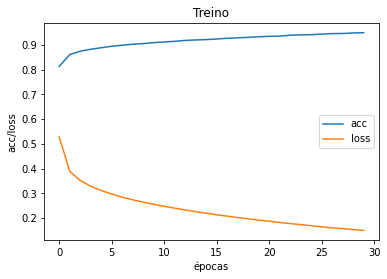

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['loss'])
#ax.set_xlim(20, 30)
#ax.set_ylim(0.9, 0.98)
plt.title('Treino')
plt.ylabel('acc/loss')
plt.xlabel('épocas')
plt.legend(['acc', 'loss'], loc='center right')
plt.show()

In [16]:
model_json = best_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

best_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Load model

In [18]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
